## Assignment 3
### Title: Descriptive Statistics - Measures of Central Tendency and variability

Perform the following operations on any open-source dataset (e.g., data.csv)

<ol>
<li>Provide summary statistics (mean, median, minimum, maximum, standard deviation) for a dataset (age, income etc.) with numeric variables grouped by one of the qualitative (categorical) variable. For example, if your categorical variable is age groups and quantitative variable is income, then provide summary statistics of income grouped by the age groups. Create a list that contains a numeric value for each response to the categorical variable.</li>
<li>Write a Python program to display some basic statistical details like percentile, mean, standard deviation etc. of the species of ‘Iris-setosa’, ‘Iris-versicolor’ and ‘Iris- versicolor’ of iris.csv dataset.</li>
</ol>

Provide the codes with outputs and explain everything that you do in this step.



### Import Libraries

In [1]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Load and review data

In [2]:
dataset = pd.read_csv("nba.csv")  
dataset.shape

(458, 9)

#### Getting description of the dataset

In [37]:
dataset.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.570000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.165781e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.100602e+06
50%,13.000000,26.000000,220.000000,2.869440e+06
75%,25.000000,30.000000,240.000000,6.331404e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [3]:
dataset.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [4]:
dataset.dtypes


Name         object
Team         object
Number      float64
Position     object
Age         float64
Height       object
Weight      float64
College      object
Salary      float64
dtype: object

In [5]:
dataset.isnull().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

In [6]:
dataset.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [7]:
mode = dataset['College'].mode()[0]
dataset['College'].fillna(mode,inplace=True)

In [8]:
dataset['Salary'].fillna(dataset['Salary'].mean(),inplace=True)

In [9]:
dataset.shape

(458, 9)

In [10]:
dataset.isnull().sum()

Name        1
Team        1
Number      1
Position    1
Age         1
Height      1
Weight      1
College     0
Salary      0
dtype: int64

In [12]:
dataset.dropna(inplace=True)
dataset.isnull().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64

In [13]:
dataset['Height'].value_counts()

Height
6-9     59
6-10    47
6-7     45
6-8     43
6-6     42
6-11    40
6-3     33
6-5     32
6-4     29
7-0     27
6-1     16
6-2     16
6-0     10
7-1      7
7-3      4
5-11     3
7-2      3
5-9      1
Name: count, dtype: int64

### Finding mean of `weight` in `nba.csv`

In [40]:
total_Weight = dataset['Weight'].sum()
avg = total_Weight/len(dataset)
avg

221.52297592997812

### Finding variance of `weight` column in the dataset

In [42]:
sqaured_deviations = [(i - avg)**2 for i in dataset['Weight']]

total_squared_deviations = sum(sqaured_deviations)

variance = total_squared_deviations / (len(dataset['Weight']) - 1)
print(variance)

695.2894928788053


### Finding standard deviation for `weight` column of `nba.csv`

In [44]:
import math
sd = math.sqrt(variance)
print(sd)

26.36834262669547


### Grouping by height

In [14]:
heightgroups = dataset.groupby(dataset['Height'])

In [15]:
heightgroups.get_group('6-11')

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
24,Chris McCullough,Brooklyn Nets,1.0,PF,21.0,6-11,200.0,Syracuse,1140240.0
55,Nerlens Noel,Philadelphia 76ers,4.0,PF,22.0,6-11,228.0,Kentucky,3457800.0
56,Jahlil Okafor,Philadelphia 76ers,8.0,C,20.0,6-11,275.0,Duke,4582680.0
60,Christian Wood,Philadelphia 76ers,35.0,PF,20.0,6-11,220.0,UNLV,525093.0
73,Jason Thompson,Toronto Raptors,1.0,PF,29.0,6-11,250.0,Rider,245177.0
81,Festus Ezeli,Golden State Warriors,31.0,C,26.0,6-11,265.0,Vanderbilt,2008748.0
90,Anderson Varejao,Golden State Warriors,18.0,PF,33.0,6-11,273.0,Kentucky,289755.0
91,Cole Aldrich,Los Angeles Clippers,45.0,C,27.0,6-11,250.0,Kansas,1100602.0
98,DeAndre Jordan,Los Angeles Clippers,6.0,C,27.0,6-11,265.0,Texas A&M,19689000.0
113,Ryan Kelly,Los Angeles Lakers,4.0,PF,25.0,6-11,230.0,Duke,1724250.0


In [16]:
heightgroups['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Height,,,,,,,,
5-11,3.0,5.891553e+05,7.926627e+05,55722.0,133733.0,211744.0,8.558720e+05,1500000.0
5-9,1.0,6.912869e+06,NaN,6912869.0,6912869.0,6912869.0,6.912869e+06,6912869.0
6-0,10.0,5.784075e+06,6.337144e+06,947276.0,2437500.0,3934473.5,4.846419e+06,21468695.0
6-1,16.0,5.217919e+06,4.286013e+06,700902.0,1646160.0,3402626.5,8.633373e+06,13500000.0
6-10,47.0,5.185375e+06,5.063120e+06,222888.0,1054584.5,3815000.0,7.025766e+06,19689000.0
6-11,40.0,6.544397e+06,6.906416e+06,245177.0,1362370.0,3107656.0,1.143804e+07,22359364.0
6-2,16.0,3.523777e+06,3.631376e+06,525093.0,947276.0,1553220.0,4.882013e+06,13437500.0
6-3,33.0,5.821784e+06,5.668225e+06,189455.0,1662360.0,4053446.0,8.000000e+06,20093064.0
6-4,29.0,4.646163e+06,5.275308e+06,134215.0,1015421.0,2525160.0,5.192520e+06,20000000.0


In [17]:
dataset.Age.value_counts()

Age
24.0    47
25.0    45
27.0    41
23.0    41
26.0    36
28.0    31
30.0    31
29.0    28
22.0    26
31.0    22
20.0    19
21.0    19
33.0    14
32.0    13
34.0    10
36.0    10
35.0     9
37.0     4
38.0     4
40.0     3
39.0     2
19.0     2
Name: count, dtype: int64

In [18]:
bins= [19,25,31,36,40]
labels = ['19-24','25-30','31-35','36-40']
dataset['AgeGroup'] = pd.cut(dataset['Age'], bins=bins,labels=labels, right=False)

In [19]:
dataset['AgeGroup'].value_counts()

AgeGroup
25-30    212
19-24    154
31-35     68
36-40     20
Name: count, dtype: int64

In [21]:
dataset.groupby('AgeGroup',observed=False)['Salary'].mean()

AgeGroup
19-24    2.761705e+06
25-30    5.870999e+06
31-35    6.635271e+06
36-40    3.897656e+06
Name: Salary, dtype: float64

In [23]:
dataset.groupby('AgeGroup',observed=False)['Salary'].median()

AgeGroup
19-24    1.721380e+06
25-30    4.025000e+06
31-35    4.671342e+06
36-40    2.834470e+06
Name: Salary, dtype: float64

In [24]:
dataset.groupby('AgeGroup',observed=False)['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
AgeGroup,,,,,,,,
19-24,154.0,2.761705e+06,3.164929e+06,30888.0,1000000.00,1.721380e+06,3.150510e+06,16407501.0
25-30,212.0,5.870999e+06,5.471951e+06,55722.0,1100602.00,4.025000e+06,8.991574e+06,22359364.0
31-35,68.0,6.635271e+06,6.238296e+06,200600.0,2096417.75,4.671342e+06,9.667979e+06,22970500.0
36-40,20.0,3.897656e+06,5.373672e+06,222888.0,947276.00,2.834470e+06,4.276685e+06,25000000.0


In [25]:
List_Of_Categories_In_AgeGroup=list(dataset['AgeGroup'].value_counts().index)

In [26]:
List_Of_Categories_In_AgeGroup

['25-30', '19-24', '31-35', '36-40']

In [30]:
list_of_salaries = list(dataset.groupby('AgeGroup',observed=False)['Salary'])
list_of_salaries

[('19-24',
  3       1148640.0
  6       1170960.0
  8       1824360.0
  9       3431040.0
  10      2569260.0
            ...    
  446    12000000.0
  447     1175880.0
  449     1348440.0
  452     2239800.0
  454      900000.0
  Name: Salary, Length: 154, dtype: float64),
 ('25-30',
  0      7.730337e+06
  1      6.796117e+06
  2      4.842684e+06
  4      5.000000e+06
  5      1.200000e+07
             ...     
  450    2.050000e+06
  451    9.813480e+05
  453    2.433333e+06
  455    2.900000e+06
  456    9.472760e+05
  Name: Salary, Length: 212, dtype: float64),
 ('31-35',
  19      6300000.0
  31      1635476.0
  33     22875000.0
  34      7402812.0
  43       947276.0
            ...    
  375    13000000.0
  394     4345000.0
  413     3750000.0
  415     3135000.0
  434     5016000.0
  Name: Salary, Length: 68, dtype: float64),
 ('36-40',
  46     4.842684e+06
  72     2.900000e+06
  93     5.675000e+06
  101    3.376000e+06
  102    9.477260e+05
  109    2.500000e+07
  119

### Analyzing the Iris Dataset for Central Tendencies and Categorical segregation

In [31]:
iris_dataset = pd.read_csv("Iris.csv")  
iris_dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Getting description of the dataset

In [36]:
iris_dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [32]:
iris_dataset.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [33]:
iris_dataset.shape

(150, 6)

In [34]:
iris_dataset.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [35]:
def basic_statistics(df):
    print("\nIris-setosa")
    print(df[df.Species=='Iris-setosa'].describe().transpose())
    print("\nIris-versicolor")
    print(df[df.Species=='Iris-versicolor'].describe().transpose())
    print("\nIris-virginica")
    print(df[df.Species=='Iris-virginica'].describe().transpose())
basic_statistics(iris_dataset)    


Iris-setosa
               count    mean        std  min     25%   50%     75%   max
Id              50.0  25.500  14.577380  1.0  13.250  25.5  37.750  50.0
SepalLengthCm   50.0   5.006   0.352490  4.3   4.800   5.0   5.200   5.8
SepalWidthCm    50.0   3.418   0.381024  2.3   3.125   3.4   3.675   4.4
PetalLengthCm   50.0   1.464   0.173511  1.0   1.400   1.5   1.575   1.9
PetalWidthCm    50.0   0.244   0.107210  0.1   0.200   0.2   0.300   0.6

Iris-versicolor
               count    mean        std   min     25%    50%    75%    max
Id              50.0  75.500  14.577380  51.0  63.250  75.50  87.75  100.0
SepalLengthCm   50.0   5.936   0.516171   4.9   5.600   5.90   6.30    7.0
SepalWidthCm    50.0   2.770   0.313798   2.0   2.525   2.80   3.00    3.4
PetalLengthCm   50.0   4.260   0.469911   3.0   4.000   4.35   4.60    5.1
PetalWidthCm    50.0   1.326   0.197753   1.0   1.200   1.30   1.50    1.8

Iris-virginica
               count     mean        std    min      25%     50%  

### Creating boxplots on `SepalLengthCm` from `iris.csv`

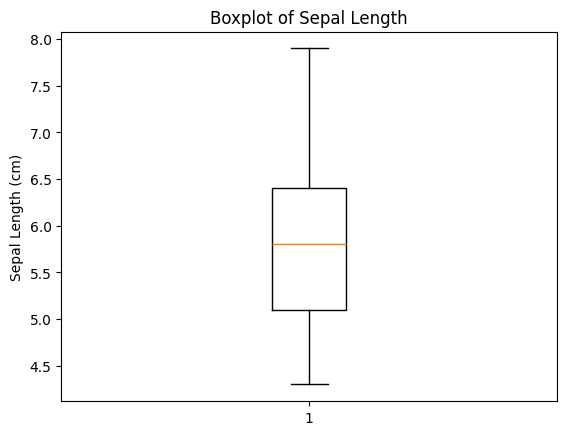

In [45]:
plt.boxplot(iris_dataset['SepalLengthCm'])

plt.title('Boxplot of Sepal Length')
plt.ylabel('Sepal Length (cm)')
plt.show()

### Creating boxplots on `SepalLengthCm` from `iris.csv`

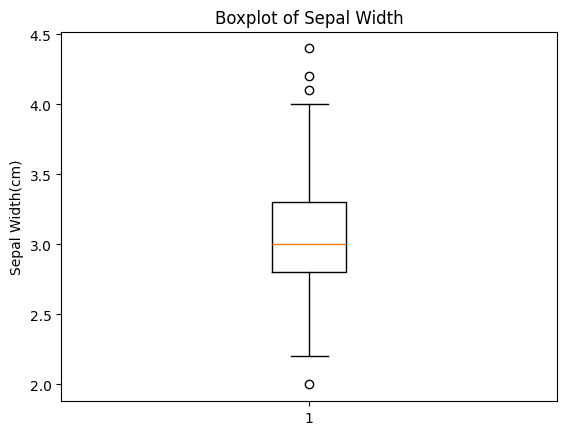

In [46]:
plt.boxplot(iris_dataset['SepalWidthCm'])

plt.title('Boxplot of Sepal Width')
plt.ylabel('Sepal Width(cm)')
plt.show()